## Key Steps for Project ##

Feel free to be creative with your solutions, but do follow the CRISP-DM process in finding your solutions.

**1. Pick a dataset.**

**2. Pose at least three questions related to business or real-world applications of how the data could be used.**

**3. Create a Jupyter Notebook, using any associated packages you'd like, to:**

- Prepare data
- Gather necessary data to answer your questions
- Handle categorical and missing data
- Provide insight into the methods you chose and why you chose them
- Analyze, Model, and Visualize

    *Provide a clear connection between your business questions and how the data answers them.*

**4. Communicate your business insights:**

- Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind.
- Create a blog post to share your questions and insights with a non-technical audience

_____________________

# Introduction #

This project is going to use data from the developer's poll of StackOverFlow in 2017 to answer questions about salaries. It is interesting that what determinants or features would positively related to high salary. With the understanding, it might be able to indicate some patterns for people (mostly developers) to follow. We are also interested in the determinants of expected salary and whether it is able to match to real wage or not. A too high expected salary might imply that a person is optimisitic or over-confident, and vice versa. This feature, i.e. over-confidence or lack-of-confidence, would be a helpful feature for extended research or business use. 

Our project is structured as two parts as followed: 

- The first part, we would like to do the data part, including data wrangling, data clearning and function build-up.

- The second part, it models by built function and answers the question where we are curious. Say, the first question: ** What are the main determinants to the developers' salary by excluding fixed effects? **, the second:  **What are the main determinants to students to expect their salaries.**, and the third: **In general, a student intends to be optimistic or pessimistive in terms of his/her expected salary.**

This work is a project asked by Term II of Data Scientist Program of Udacity. 

## Part I: Data 

### Import Libraries & Data Loading 

In [4]:
# import necessary libraries and modules 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import zipfile 
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import seaborn as sns
import random
from itertools import product
import warnings
import time 

% matplotlib inline 

# set the parameters
pd.set_option('display.max_colwidth', -1) # display full text 
warnings.filterwarnings('ignore')  # ignore warnings


In [5]:
# load data from a poll of stackover flow in 2017
zip_sof2017 = zipfile.ZipFile('stack-overflow-developer-survey-2017.zip')
df_a = pd.read_csv(zip_sof2017.open('survey_results_public.csv'))
df_q = pd.read_csv(zip_sof2017.open('survey_results_schema.csv'))

### Pre-process data

We would like to know what is the sample size, and how many features are there in the data.

In [6]:
# To see how many respondents and how many features 
df_a.shape

(51392, 154)

To see how are the missing values distributed among different features.

In [7]:
(df_a.isnull().sum()/df_a.shape[0]).sort_values()

Respondent                   0.000000
Professional                 0.000000
ProgramHobby                 0.000000
Country                      0.000000
University                   0.000000
EmploymentStatus             0.000000
FormalEducation              0.000000
YearsProgram                 0.004806
PronounceGIF                 0.007472
HomeRemote                   0.143680
MajorUndergrad               0.166388
CareerSatisfaction           0.169229
ClickyKeys                   0.181857
YearsCodedJob                0.204351
JobSatisfaction              0.214352
CompanySize                  0.242645
TabsSpaces                   0.244026
CompanyType                  0.244571
StackOverflowDescribes       0.281367
WorkStart                    0.285959
HaveWorkedLanguage           0.287340
StackOverflowSatisfaction    0.287983
AuditoryEnvironment          0.290609
DeveloperType                0.297070
IDE                          0.302810
StackOverflowDevices         0.315010
Gender      

Since we only cares developers and students, we pick them out from the original data 

In [8]:
# leave data of interest 
df_a = pd.concat([df_a[df_a.Professional == 'Professional developer'], df_a[df_a.Professional == 'Student']])

Create a dataset for question 1.

In [9]:
df_q1 = df_a[df_a.Professional == 'Professional developer'].reset_index(drop = True)
df_q1.shape

(36131, 154)

Understand more about categorical features and numerical features.

*Numerical features* :

In [10]:
df_q1.select_dtypes(include = ['float','int']).head()

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
0,8.0,9.0,NaN,8.0,113750.0,NaN
1,6.0,8.0,NaN,NaN,NaN,NaN
2,7.0,7.0,1.0,7.0,NaN,NaN
3,6.0,6.0,2.0,8.0,NaN,NaN
4,6.0,8.0,1.0,9.0,NaN,NaN


*Categorical features* :

In [11]:
df_q1.select_dtypes(include = ['object'])

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers
0,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day each week","10,000 or more employees",Publicly-traded corporation,...,Agree,Agree,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree
1,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup mode",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,Pre-series A startup,...,Agree,Disagree,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree
3,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day each week","5,000 to 9,999 employees","Privately-held limited company, not in startup mode",...,Strongly agree,Somewhat agree,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree
4,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-employed",Master's degree,Computer science or software engineering,It's complicated,NaN,NaN,...,Agree,Strongly disagree,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree
5,Professional developer,No,Canada,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,100 to 499 employees,"Privately-held limited company, not in startup mode",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Professional developer,"Yes, both",Germany,No,Employed full-time,Some college/university study without earning a bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day each week",Fewer than 10 employees,Venture-funded startup,...,Agree,Somewhat agree,Disagree,Female,A master's degree,Hispanic or Latino/Latina,Somewhat agree,Agree,Disagree,Strongly agree
7,Professional developer,"Yes, I program as a hobby",United Kingdom,No,Employed full-time,Professional degree,Computer engineering or electrical/electronics engineering,All or almost all the time (I'm full-time remote),"5,000 to 9,999 employees",Publicly-traded corporation,...,Strongly agree,Agree,Disagree,Male,High school,White or of European descent,Somewhat agree,Agree,Disagree,Agree
8,Professional developer,"Yes, I program as a hobby",United States,"Yes, part-time","Independent contractor, freelancer, or self-employed",Primary/elementary school,NaN,All or almost all the time (I'm full-time remote),NaN,NaN,...,Strongly agree,Agree,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Somewhat agree,Strongly disagree,Agree
9,Professional developer,"Yes, both",United Kingdom,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,...,Strongly agree,Somewhat agree,Strongly disagree,Male,High school,White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree


Next, it follows the data wrangling and we are going to impute numerics data with their average value while impute categorical data with their mode. At the same time, we drop some features that has only limited information.

In [12]:
def dataWrangler(df, response, irrelevant = None, drop_value = 0.98): 
    """
    The function aims to drop irrelevant features and impute the missing values, 
    for both numerics data and categorical data.
    By means of imputation, mean value imputation is applied to numerics data, 
    and mode imputation is applied to categorical data. 
    ---------
    INPUT: 
    
    df: Pandas DataFrame that you want to impute missing values. 
    response: Str. Response feature, where we drop the missing values. 
    irrelevant: List or Str. Features that is recognized as irrelevant, such as id number. 
    drop_value: Float with interval [0.0,1.0]. A lower bound that if a features with missing value 
                more than the value, it will be dropped.
    ---------
    OUTPUT:
    
    df: dataframe that has been cleaned.
    
    """
    # drop data that have no response value 
    df = df.dropna(axis = 0, how = 'any', subset = [response])
    # drop features that is recognized irrelevant
    try:
        df = df.drop(irrelevant, axis = 1)
    except:
        pass
    # drop features that have too few non nan values 
    df = df.drop(labels = df.columns[(df.isnull().sum()/df.shape[0])>= drop_value], axis = 1)
    # reset index 
    df.reset_index(drop = True, inplace = True)
    
    # list of categorical data & numerical data 
    cat_list = list(df.select_dtypes(include = ['object']).columns) 
    num_list = list(df.select_dtypes(include = ['int','float']).columns)
    
    # For numerics imputation
    for col in num_list:
        df[col][df[col].isnull()==True] = df[col].mean()
    
    # For categorical imputation
    for col in cat_list:
        df[col][df[col].isnull()==True] = df[col].mode()[0]
        
    
    # assert that all missing values have been imputed 
    assert (df.isnull().sum()>0).sum() == 0

    # To dummy the categorical features 
    df = pd.get_dummies(df, columns = cat_list, drop_first = True, prefix = cat_list)

    
    return df
    
    

### Building Function 

In [13]:
def plot_the_process(alphas, num_feats, cv_scores, train_scores):
    """
    This function plots the process of model selection among the various magnitude of regularization and edurability of missing value. 
    -------
    INPUT - 
    alphas: List of float or int. Magnitude of penalty of Lasso.
    num_feats, cv_scores, train_scores: Dict. Variables in function LassoModel.
    -------
    OUTPUT - 
    
    Plots for training and cross-validation score in terms of differnet sets of parameters. 
    
    """
    # Check whether alphas is odd or not
    if len(alphas) % 2 == 1:
        row = len(alphas)//2 + 1
    else:
        row = len(alphas)//2 
    
    fig, axes = plt.subplots(row, 2, subplot_kw = dict(),  figsize = (20,15))
    
    idx_0, idx_1 = 0, 0
    
    # Plot the training score and cv score for various parameters 
    for alpha in alphas:
            
        axes[idx_0, idx_1].plot(num_feats[str(alpha)], cv_scores[str(alpha)], 'r')
        axes[idx_0, idx_1].plot(num_feats[str(alpha)], train_scores[str(alpha)], 'g')
        axes[idx_0, idx_1].set_xticks(num_feats[str(alpha)])
        axes[idx_0, idx_1].legend(['Cross Validation','Train'], fontsize = 15)
        axes[idx_0, idx_1].set_title(f'R-square on Different Number of Features with alpha = {alpha}', fontsize = 15)
        axes[idx_0, idx_1].set_xlabel('Number of features', fontsize = 15)
        axes[idx_0, idx_1].set_ylabel('R-square', fontsize = 15)
        
        # tune the axis of subplots 
        if idx_1 == 0:
            idx_1 += 1
        
        elif idx_1 == 1:
            idx_1 -= 1
            idx_0 += 1
            
    # leave the space         
    fig.tight_layout(pad=1.08, w_pad=5.0, h_pad=5.0)

In [14]:
def lassoModel(df, response, cutoffs, alphas, irrelevant = None, plot = True, cv_size = 0.25, test_size = 0.2, state = 40):
    
    """
    This model aims to find the optimal set of parameters to train a lasso model and make predictions.
    It includes two other helper function: dataWrangler & plot_the_process.
    -------
    INPUT - 
    
    df: Pandas Dataframe. Data that would like to make prediction.
    response: Str. The response variable. 
    cutoffs: List of float. cutoffs are percents that can be tolerant in terms of missing value, locating between [0,1].
    alphas: List of int or float. alphas are magnitude of penalty in L1 regularization. 
    plot: Boolean. If true, it will plot the proccess of training. 
    cv_size: Float. The portion of traing set which has been split off from the entire dataset. 
    test_size: Float. The portion of entire dataset, the other part is the training set. 
    state: Int. The random state for fixing results. 
    -------
    OUTPUT:
    
    num_feats, cv_scores, train_scores: Dicts. These are for the function plot_the_process
    X_test: Pandas DataFrame. The test set of X 
    y_test: Series. The test set of y
    lasso:  The trained model. 
    
    """
    # Data wrangling 
    df = dataWrangler(df, response = response, irrelevant = irrelevant)
    
    # Split X and y
    X = df.drop(response, axis = 1)
    y = df[response]
    
    train_scores, cv_scores, results, num_feats = dict(), dict(), dict(), dict()
    
    # To find the optimal set of parameters 
    for alpha in alphas:
        
        train_scores[str(alpha)], cv_scores[str(alpha)], results[str(alpha)], num_feats[str(alpha)] = [], [], [], []
        
        for cutoff in cutoffs:
        
            print(f'Paras: alpha - {alpha}, cutoff - {cutoff}')
        
            start = time.time()
            
            # Drop those features that have missing value more than cutoff 
            X_reduced = X.iloc[:, np.where((X.sum() >= len(X)*cutoff) == True)[0]]
            X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = test_size, random_state = state)
            X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = cv_size, random_state = state)
            
            lasso = Lasso(alpha = alpha, normalize = True, random_state = state)
            lasso.fit(X_train, y_train)
            
            # Drop off those 0 value in coefficients 
            num_feats[str(alpha)].append(len(lasso.coef_[(lasso.coef_)!=0]))
            train_scores[str(alpha)].append(lasso.score(X_train, y_train))
            cv_scores[str(alpha)].append(lasso.score(X_cv, y_cv))
            results[str(alpha)].append([lasso.score(X_cv, y_cv),cutoff])
            
            end = time.time()
            print(f'This iteration takes {(end - start):.2f} sec.')
    
    
    print('Finished!')
    print('\n')
    print('------------------------------')
    
    # optimal parameters 
    best_alpha = max(cv_scores, key = cv_scores.get)
    best_score = max(cv_scores[best_alpha])
    best_cutoff = max(results[best_alpha])[1]
    
    print('Results Report:')
    print('- - - - - - - - - - - - - - - - ')
    print(f'The best cross-validation score is : {best_score:.4f}')
    print(f'The corresponding alpha & cutoff are {best_alpha} & {best_cutoff}')
    
    # if to plot 
    if plot:
    
        plot_the_process(alphas, num_feats, cv_scores, train_scores)
    
    # Re-train the model by optimal set
    X_reduced = X.iloc[:, np.where((X.sum() >= len(X)*best_cutoff) == True)[0]]
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = test_size, random_state = state)
    X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = cv_size, random_state = state)
    
    
    lasso = Lasso(alpha = int(best_alpha), normalize = True, random_state = state)
    lasso.fit(X_train, y_train)
    
    test_score = lasso.score(X_test, y_test)
    num_features = len(lasso.coef_[(lasso.coef_)!=0])

    print(f'The test score is: {test_score:.4f} with {num_features} features.')
    
    return num_feats, cv_scores, train_scores, X_test, y_test, lasso
    

## Question 1: What matters to the salary for a professional developer?

Paras: alpha - 0, cutoff - 0
This iteration takes 205.17 sec.
Paras: alpha - 0, cutoff - 0.0005
This iteration takes 57.98 sec.
Paras: alpha - 0, cutoff - 0.001
This iteration takes 39.70 sec.
Paras: alpha - 0, cutoff - 0.005
This iteration takes 18.25 sec.
Paras: alpha - 0, cutoff - 0.01
This iteration takes 12.80 sec.
Paras: alpha - 0, cutoff - 0.05
This iteration takes 8.55 sec.
Paras: alpha - 1, cutoff - 0
This iteration takes 55.86 sec.
Paras: alpha - 1, cutoff - 0.0005
This iteration takes 10.78 sec.
Paras: alpha - 1, cutoff - 0.001
This iteration takes 6.78 sec.
Paras: alpha - 1, cutoff - 0.005
This iteration takes 4.19 sec.
Paras: alpha - 1, cutoff - 0.01
This iteration takes 3.56 sec.
Paras: alpha - 1, cutoff - 0.05
This iteration takes 2.78 sec.
Paras: alpha - 2, cutoff - 0
This iteration takes 30.97 sec.
Paras: alpha - 2, cutoff - 0.0005
This iteration takes 7.83 sec.
Paras: alpha - 2, cutoff - 0.001
This iteration takes 5.92 sec.
Paras: alpha - 2, cutoff - 0.005
This iterat

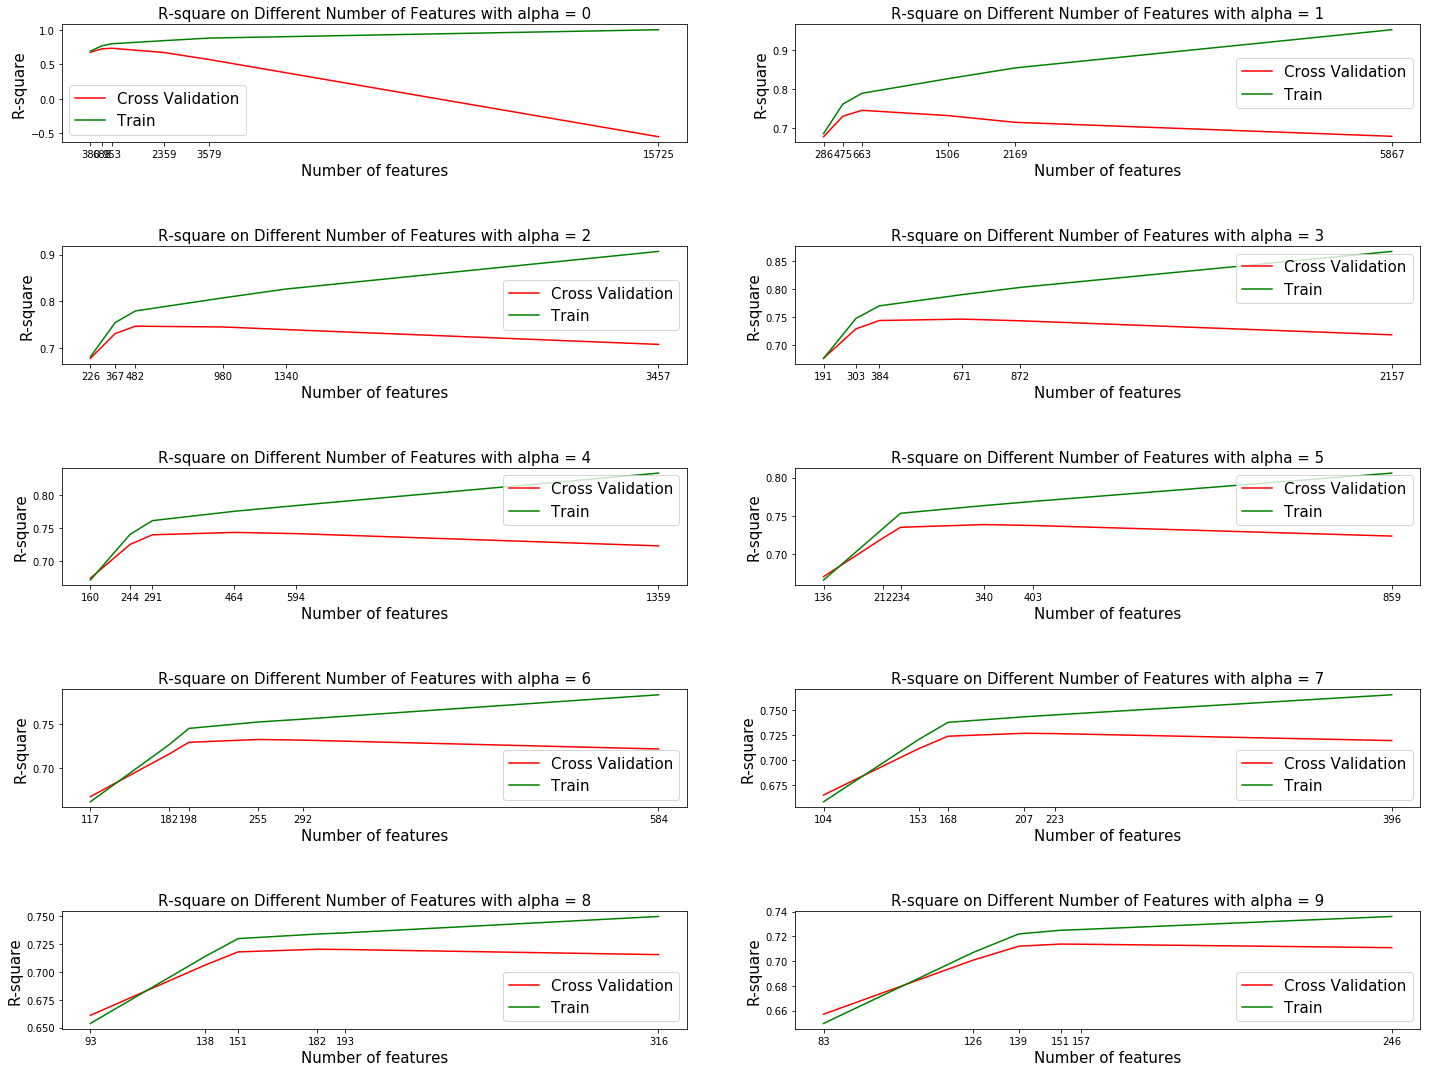

In [66]:
# Train process 
alphas = np.arange(0,10,1)
cutoffs = [0,0.0005,0.001,0.005,0.01,0.05]

num_feats, cv_scores, train_scores, X_test, y_test, lasso = lassoModel(df_q1, response = 'Salary', irrelevant = ['Respondent'], cutoffs = cutoffs, alphas = alphas )

In [15]:
# Store the best set of parameters 

alphas = [5]
cutoffs = [0.001]
num_feats, cv_scores, train_scores, X_test, y_test, lasso = lassoModel(df_q1, response = 'Salary', irrelevant = ['Respondent'], cutoffs = cutoffs, alphas = alphas, plot = False )

Paras: alpha - 5, cutoff - 0.001
This iteration takes 5.55 sec.
Finished!


------------------------------
Results Report:
- - - - - - - - - - - - - - - - 
The best cross-validation score is : 0.7388
The corresponding alpha & cutoff are 5 & 0.001
The test score is: 0.7406 with 340 features.


In [16]:
def coef_weights(coefficients, X_test):
    
    """
    This function aims to provide a dataframe that ranks the variables with the corresponding coefficients.
    ---------
    INPUT - 
    coefficients: coefficients that is trained in lasso model. 
    X: Set to provide the name of features.
    ---------
    OUTPUT - 
    df_coefs: Pandas dataframe. Including three variables: feature name, coefficient and its absolute value.

    """
    df_coefs = pd.DataFrame()
    df_coefs['features'] = X_test.columns
    df_coefs['coefficients'] = lasso.coef_
    df_coefs['abs_coef'] = np.abs(lasso.coef_)
    df_coefs = df_coefs[df_coefs['abs_coef'] > 0]
    df_coefs = df_coefs.sort_values('coefficients', ascending = False).reset_index(drop = True)
    
    
    return df_coefs

In [17]:
df_coefs_q1 = coef_weights(lasso.coef_, X_test)

Top 10 features that matters the most:

In [98]:
df_coefs_q1[:10]
plt.savefig('.\\testa.png')

Top 10 features that worsen the most:

In [19]:
df_coefs_q1[-10:]

,features,coefficients,abs_coef
330,Currency_Brazilian reais (R$),-11510.045103,11510.045103
331,Country_Turkey,-11740.496953,11740.496953
332,Currency_Polish zloty (zl),-12192.799037,12192.799037
333,Currency_Mexican pesos (MXN$),-12507.433344,12507.433344
334,Currency_Russian rubles (?),-12510.799324,12510.799324
335,Country_Hungary,-12704.013305,12704.013305
336,Country_Iran,-12826.210221,12826.210221
337,Country_Ukraine,-14036.964636,14036.964636
338,Overpaid_Greatly underpaid,-14422.986433,14422.986433
339,Country_Indonesia,-17038.565113,17038.565113


In [20]:
def mean_level(df, groupby, feature, cv = 20, plot = True, figsize = (10,8), fontsize = 10):
    """
    To show the average value of given feature with grouping by certain characteristic.
    -------
    INPUT - 
    df: Pandas DataFrame. The original data.
    groupby: Str. The variable that would like to be groupped. 
    feature: Str. The varaible of which would like to see the average. 
    cv: Int. The critical value that that the minimum counts a variable should have.
    plot: Boolean. If true, to plot the bar chart for average features in terms of given characteristic. 
    figsize: Tuple. (width, height)
    fontsize: Int. the font size.
    """
    # groupby building 
    df_groupby = df.groupby(groupby)
    df_groupby_feature = df_groupby[feature].mean()
    
    # Drop feature that have samples that is lower than critical values 
    for i in df_groupby.indices:
        if df_groupby[feature].count()[i] < cv:
            df = df[df[groupby]!= i]
            df_groupby_feature = df_groupby_feature.drop(i, axis = 0)
    
    
    s_mean = df_groupby_feature.mean()
    w_mean = df[feature].mean()
    df_groupby_feature.sort_values(ascending = False, inplace = True)
    
    # plot the bar chart descendingly
    if plot:
        
        values = df_groupby_feature.values
        x = range(len(df_groupby_feature))
        idx = list(df_groupby_feature.index)

        fig, ax = plt.subplots(figsize = figsize, dpi = 80)
        ax.bar(x, values, width=0.8, alpha=0.8)
        ax.axhline(y = s_mean, color = 'black',linestyle = "--") 
        ax.text(len(values)*0.7,s_mean*1.05, "Simple-Average Level :"+str(int(s_mean)))
        ax.axhline(y = w_mean, color = 'grey',linestyle = ":") 
        ax.text(len(values)*0.7,w_mean*1.05, "Weighted-Average Level :"+str(int(w_mean)))
        plt.xticks([index for index in x], idx, rotation = 90, fontsize = fontsize);

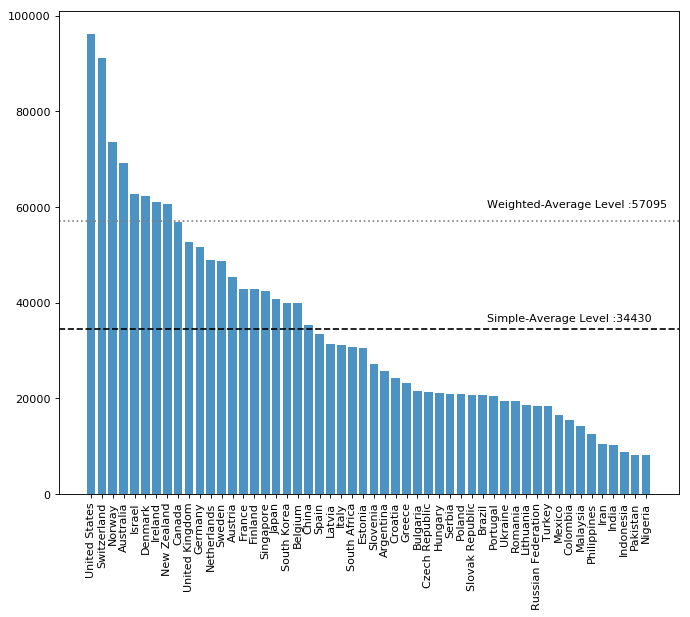

In [86]:
mean_level(df_q1, groupby = 'Country', feature = 'Salary')
plt.savefig('.\\fx_country_q1.png')

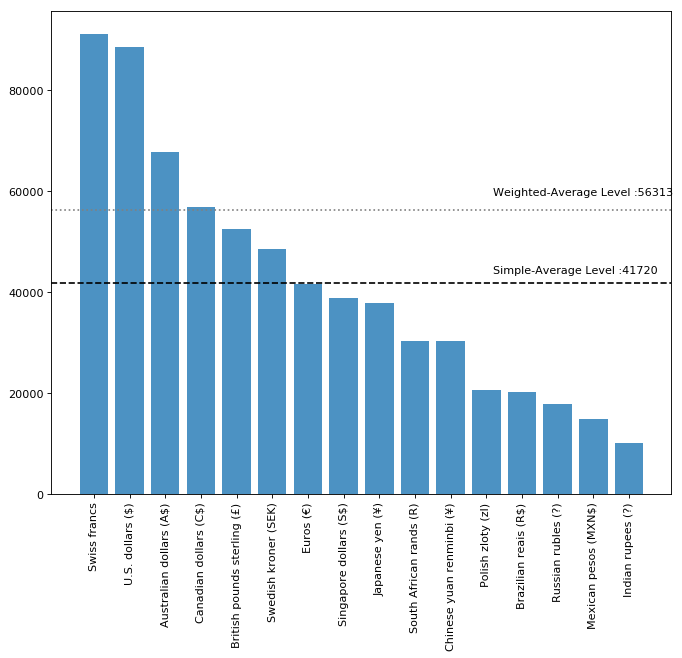

In [85]:
mean_level(df_q1, groupby = 'Currency', feature = 'Salary')
plt.savefig('.\\fx_currency_q1.png')

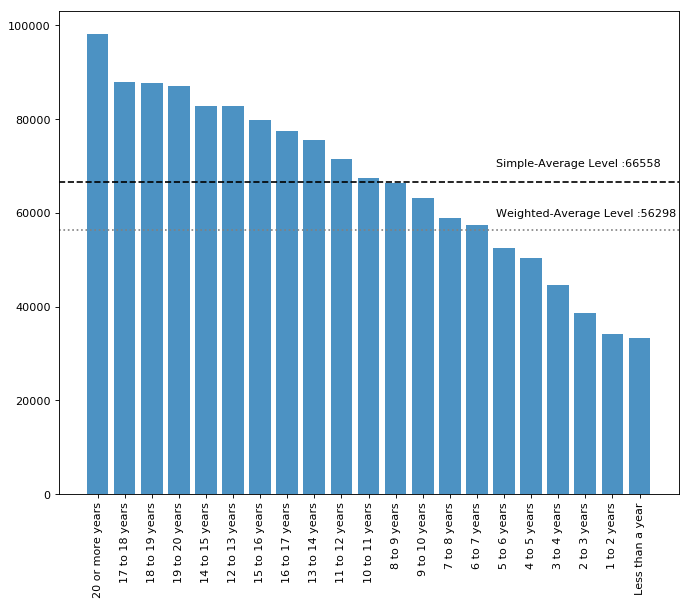

In [84]:
mean_level(df_q1, groupby = 'YearsCodedJob', feature = 'Salary')
plt.savefig('.\\fx_years_q1.png')

As we can see, the countries, currency and the year coded are strong fixed effects. For a developer, those features are not changeable or not personal-related and with no elastics. As we would like to seek some determinants which can give some pattern for developers to follow, the geographical and chronical reasons are clearly not a helpful suggestions. Hence, it is suggested that we should ignore those strong fixed effects features and put more emphasis on features with more flexibility.  

In [24]:
def fixed_effect_cleaner(df, labels):
    """
    This help funtion aims to delete the fixed effect.
    -------
    INPUT - 
    df: Pandas DataFrame. Original data. 
    labels: List of Str. Fixed effect features.
    -------
    OUTPUT - 
    df : Pandas DataFrame. Datas that have eliminated the fixed effect. 
    """
    
    for label in labels:
        print('---'+label)
        
        for i in range(len(df)):
            try:
                if df.features[i][:len(label)] == label:
                    df = df[df.features != df.features[i]]
            except:
                pass
        
        df = df.reset_index(drop= True)
    
    print('Done!')
    
    return df

Here, we ignore the fixed effects and look through those we can control better.

In [25]:
fixed_effects = ['Country', 'Currency','YearsCodedJob']
df_coefs_q1 = fixed_effect_cleaner(df_coefs_q1, fixed_effects)

---Country
---Currency
---YearsCodedJob
Done!


In [26]:
for i in range(len(df_coefs_q1.features.values)):
    df_coefs_q1.features.values[i]=  df_coefs_q1.features.values[i].replace('_', ':\n')
    df_coefs_q1.features.values[i] = df_coefs_q1.features.values[i].replace(';', '\n')
    print(df_coefs_q1.features.values[i])

MetricAssess:
Customer satisfaction
 Revenue performance
 Manager's rating
 Peers' rating
JobProfile:
Hired.com
 LinkedIn
WantWorkLanguage:
Go
 Scala
DeveloperType:
Machine learning specialist
 Data scientist
HaveWorkedPlatform:
Linux Desktop
 Mac OS
 Raspberry Pi
 Amazon Web Services (AWS)
HaveWorkedPlatform:
iOS
 Mac OS
 Amazon Web Services (AWS)
CompanyType:
Venture-funded startup
WantWorkFramework:
Spark
 .NET Core
Methodology:
Agile
 Lean
 Scrum
 Pair
 Kanban
 Domain-driven design
YearsProgram:
20 or more years
ImportantBenefits:
Stock options
 Health benefits
 Equipment
 Professional development sponsorship
 Remote options
FormalEducation:
Doctoral degree
CompanyType:
Publicly-traded corporation
EducationTypes:
Online course
 Industry certification
 Self-taught
 Hackathon
 Open source contributions
YearsProgram:
17 to 18 years
SelfTaughtTypes:
Stack Overflow Q&A
 Non-Stack online communities
WantWorkDatabase:
Cassandra
 MySQL
DeveloperType:
Machine learning specialist
 Developer 

In [27]:
df_coefs_q1[-10:]

,features,coefficients,abs_coef
268,YearsProgram:\n4 to 5 years,-5189.614166,5189.614166
269,HaveWorkedLanguage:\nJavaScript\n PHP\n Ruby\n SQL,-5474.904137,5474.904137
270,Overpaid:\nSomewhat underpaid,-5511.487254,5511.487254
271,ImportantBenefits:\nAnnual bonus\n Vacation/days off\n Professional development sponsorship\n Education sponsorship\n Remote options,-6300.252472,6300.252472
272,EmploymentStatus:\nEmployed part-time,-6991.275608,6991.275608
273,MetricAssess:\nHours worked,-7633.394322,7633.394322
274,WantWorkFramework:\nNode.js\n Cordova,-8128.453918,8128.453918
275,WantWorkLanguage:\nJavaScript\n PHP\n Python,-8658.073614,8658.073614
276,WantWorkLanguage:\nGo\n Rust,-9627.160599,9627.160599
277,Overpaid:\nGreatly underpaid,-14422.986433,14422.986433


In [28]:
df_coefs_q1 = pd.concat([df_coefs_q1[:5],df_coefs_q1[-5:]],axis = 0).reset_index(drop = True)
df_coefs_q1.shape

(10, 3)

In [29]:
df_coefs_q1

,features,coefficients,abs_coef
0,MetricAssess:\nCustomer satisfaction\n Revenue performance\n Manager's rating\n Peers' rating,15308.274961,15308.274961
1,JobProfile:\nHired.com\n LinkedIn,11296.352284,11296.352284
2,WantWorkLanguage:\nGo\n Scala,11233.626374,11233.626374
3,DeveloperType:\nMachine learning specialist\n Data scientist,11089.247312,11089.247312
4,HaveWorkedPlatform:\nLinux Desktop\n Mac OS\n Raspberry Pi\n Amazon Web Services (AWS),10608.947477,10608.947477
5,MetricAssess:\nHours worked,-7633.394322,7633.394322
6,WantWorkFramework:\nNode.js\n Cordova,-8128.453918,8128.453918
7,WantWorkLanguage:\nJavaScript\n PHP\n Python,-8658.073614,8658.073614
8,WantWorkLanguage:\nGo\n Rust,-9627.160599,9627.160599
9,Overpaid:\nGreatly underpaid,-14422.986433,14422.986433


In [30]:
df_coefs_q1[0:5]

,features,coefficients,abs_coef
0,MetricAssess:\nCustomer satisfaction\n Revenue performance\n Manager's rating\n Peers' rating,15308.274961,15308.274961
1,JobProfile:\nHired.com\n LinkedIn,11296.352284,11296.352284
2,WantWorkLanguage:\nGo\n Scala,11233.626374,11233.626374
3,DeveloperType:\nMachine learning specialist\n Data scientist,11089.247312,11089.247312
4,HaveWorkedPlatform:\nLinux Desktop\n Mac OS\n Raspberry Pi\n Amazon Web Services (AWS),10608.947477,10608.947477


In [31]:
df_coefs_q1[-5:]

,features,coefficients,abs_coef
5,MetricAssess:\nHours worked,-7633.394322,7633.394322
6,WantWorkFramework:\nNode.js\n Cordova,-8128.453918,8128.453918
7,WantWorkLanguage:\nJavaScript\n PHP\n Python,-8658.073614,8658.073614
8,WantWorkLanguage:\nGo\n Rust,-9627.160599,9627.160599
9,Overpaid:\nGreatly underpaid,-14422.986433,14422.986433


By eliminating those fixed effects, we select the top 5 positive and negative determinants in salary of professional developer, respectively. 
According to the ranks, we have thus derived following conclusions:

- Do not evaluate yourself by quantity such as Hours worked. Instead, to put effort more on raising overall quality, such as customer satisfaction and play better on teamwork to earn higher peer's and manager's rating. **The difference of working style worth $33,000 annually. **

- Other than formal schooling, **try to learn more on online course, industry certification, hackathon, and open scource contributions.**

- Do not work too much on Rust language. Instead, do more on Scala and you may see a huge change. **This difference can lead you to a loss in about $25,000 per year**

- Try to **be a machine learning specialist or a data scientist.**

- Try to work on following platforms: **Linux, Mac OS, Raspberry Pi, and AWS. **

Lastly, here are some takeaway: those who think of their salary are greatly underpaid are those who literally have lower salary. It seems like they have a clear picture of themselves. 

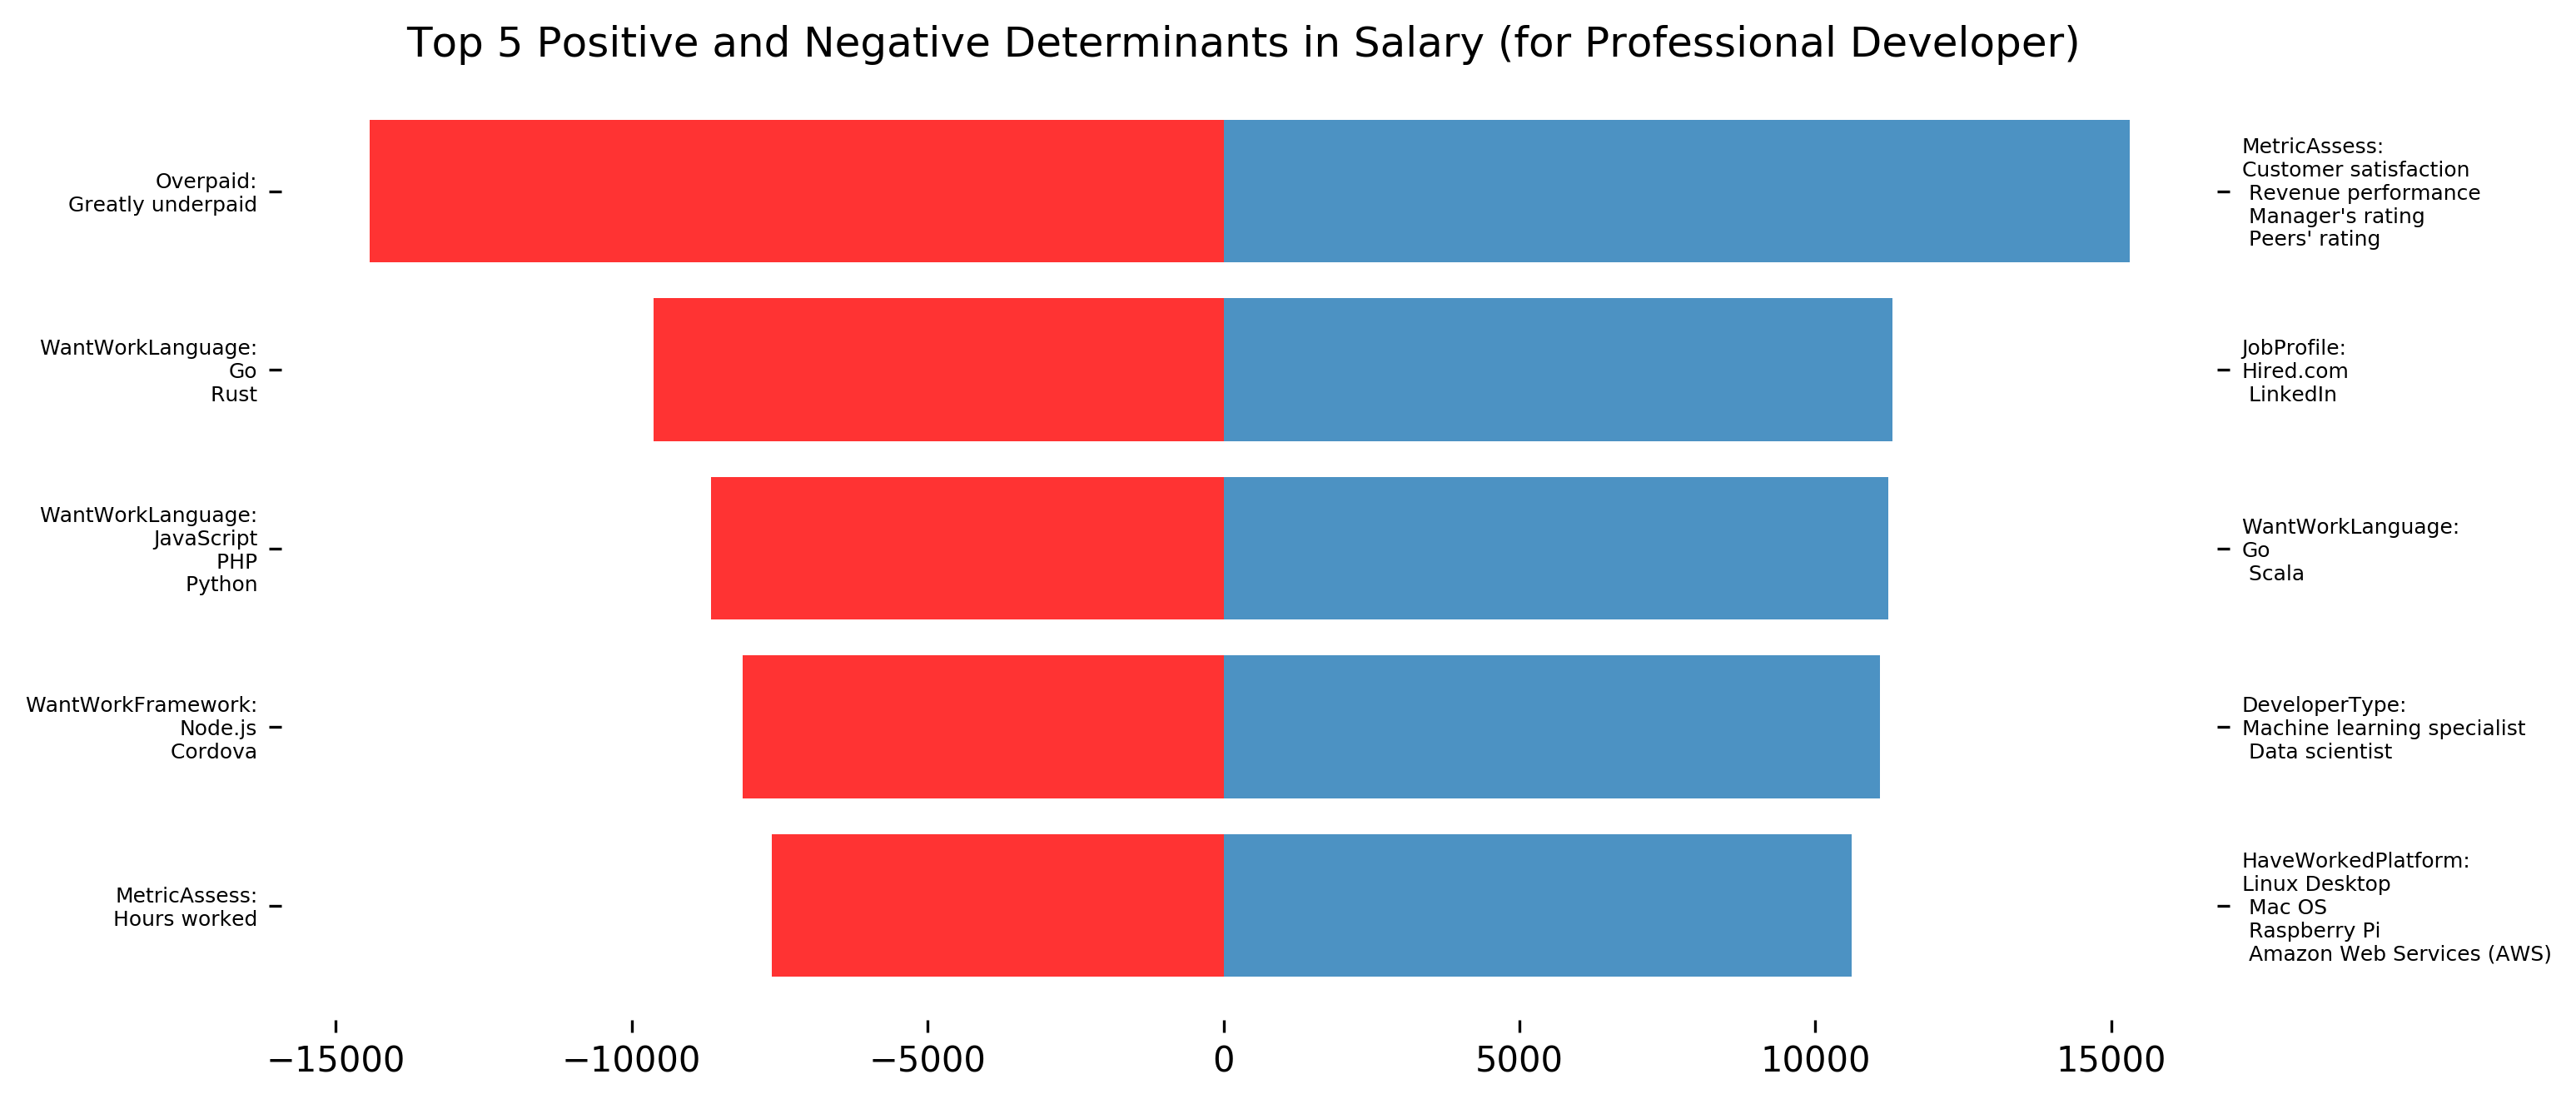

In [82]:
values_pos = df_coefs_q1.coefficients[0:5].sort_values()
values_neg = df_coefs_q1.coefficients[5:10]
x = range(len(values_pos))
labels_pos = list(df_coefs_q1[0:5].sort_values('coefficients').features)
labels_neg = list(df_coefs_q1.features.values[5:10])

fig, ax = plt.subplots(figsize = (10,5), dpi = 300)

ax.barh(x, values_pos, height=0.8, alpha=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.yticks([index for index in x], labels_neg, fontsize = 6)

ax2 = ax.twinx()
ax2.barh(x, values_neg, height= 0.8, alpha = 0.8, color = 'r')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.yticks([index for index in x], labels_pos, fontsize = 6)

plt.title('Top 5 Positive and Negative Determinants in Salary (for Professional Developer) ', fontsize =12)
plt.savefig('.\\Deter_Developers.png')

## Question 2: What matters to the expected salary for a student?

Now, we split the data for student from the original data. 

In [32]:
df_q2 = df_a[df_a.Professional == 'Student'].reset_index(drop = True)
df_q2.shape

(8224, 154)

In [33]:
df_q2.select_dtypes(include = ['float']).head()

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
0,NaN,NaN,0.0,9.0,NaN,NaN
1,NaN,NaN,NaN,8.0,NaN,37500.0
2,NaN,NaN,0.0,6.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,7.0,NaN,NaN


In [34]:
df_q2.select_dtypes(include = ['object']).head()

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers
0,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,...,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree
1,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning a bachelor's degree,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup mode",...,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree
2,Student,"Yes, both",New Zealand,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,...,Strongly agree,Agree,Disagree,NaN,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Agree
3,Student,"Yes, I program as a hobby",Croatia,"Yes, full-time","Not employed, but looking for work",Secondary school,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Student,"Yes, both",United States,No,I prefer not to say,I prefer not to answer,NaN,NaN,NaN,NaN,...,Agree,Agree,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Somewhat agree,Disagree,Agree


## Modelling 

Since we have already built up all the function we need, it is fine to procceed to modelling directly.

Paras: alpha - 15, cutoff - 0
This iteration takes 1.31 sec.
Paras: alpha - 15, cutoff - 0.0005
This iteration takes 0.70 sec.
Paras: alpha - 15, cutoff - 0.001
This iteration takes 0.51 sec.
Paras: alpha - 15, cutoff - 0.005
This iteration takes 0.30 sec.
Paras: alpha - 15, cutoff - 0.01
This iteration takes 0.28 sec.
Paras: alpha - 15, cutoff - 0.05
This iteration takes 0.22 sec.
Paras: alpha - 16, cutoff - 0
This iteration takes 1.31 sec.
Paras: alpha - 16, cutoff - 0.0005
This iteration takes 0.69 sec.
Paras: alpha - 16, cutoff - 0.001
This iteration takes 0.48 sec.
Paras: alpha - 16, cutoff - 0.005
This iteration takes 0.30 sec.
Paras: alpha - 16, cutoff - 0.01
This iteration takes 0.28 sec.
Paras: alpha - 16, cutoff - 0.05
This iteration takes 0.22 sec.
Paras: alpha - 17, cutoff - 0
This iteration takes 1.31 sec.
Paras: alpha - 17, cutoff - 0.0005
This iteration takes 0.66 sec.
Paras: alpha - 17, cutoff - 0.001
This iteration takes 0.48 sec.
Paras: alpha - 17, cutoff - 0.005
This

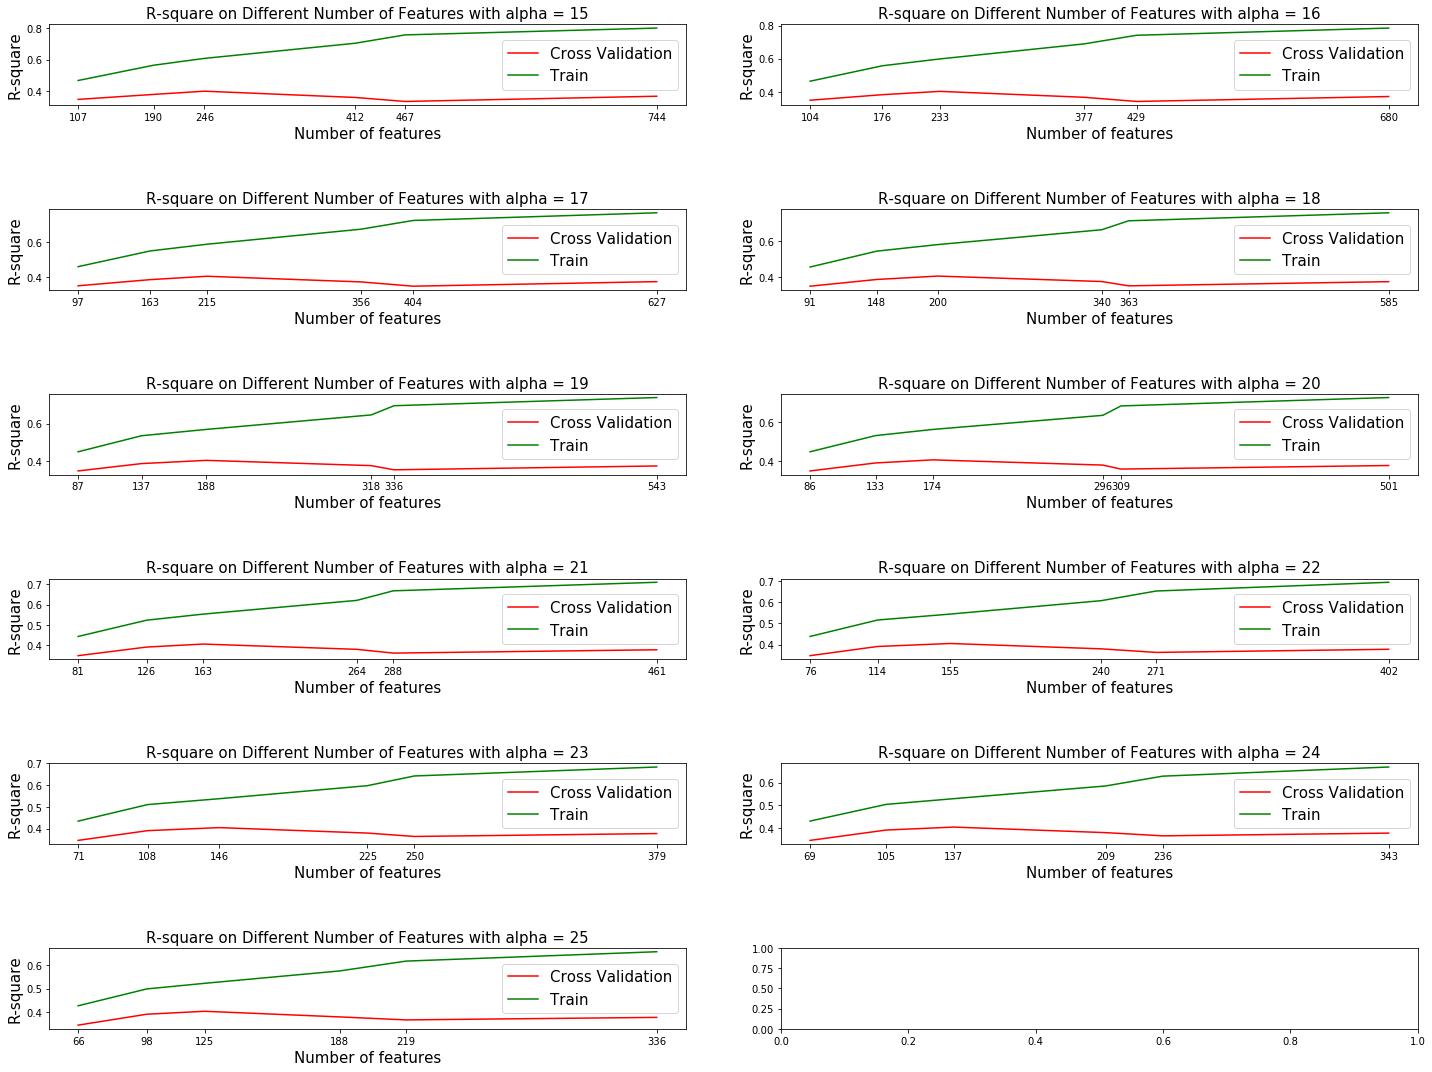

In [22]:
# Train process 
alphas = np.arange(15,26,1)
cutoffs = [0,0.0005,0.001,0.005,0.01,0.05]

num_feats, cv_scores, train_scores, X_test, y_test, lasso = lassoModel(df_q2, response = 'ExpectedSalary', irrelevant = ['Respondent'], cutoffs = cutoffs, alphas = alphas )

In [35]:
# Store the best set of parameters 

alphas = [24]
cutoffs = [0.005]
num_feats_2, cv_scores_2, train_scores_2, X_test_2, y_test_2, lasso_2 = lassoModel(df_q1, response = 'Salary', irrelevant = ['Respondent'], cutoffs = cutoffs, alphas = alphas, plot = False )

Paras: alpha - 24, cutoff - 0.005
This iteration takes 3.28 sec.
Finished!


------------------------------
Results Report:
- - - - - - - - - - - - - - - - 
The best cross-validation score is : 0.6224
The corresponding alpha & cutoff are 24 & 0.005
The test score is: 0.6164 with 41 features.


In [38]:
df_coefs_q2 = coef_weights(lasso.coef_, X_test)

In [39]:
df_coefs_q2[:10]

,features,coefficients,abs_coef
0,Country_United States,49327.324092,49327.324092
1,Currency_Swiss francs,48831.133259,48831.133259
2,Country_Norway,25243.120589,25243.120589
3,Country_Australia,24409.436420,24409.436420
4,YearsCodedJob_20 or more years,18908.817426,18908.817426
5,Country_Ireland,16271.494213,16271.494213
6,MetricAssess_Customer satisfaction; Revenue performance; Manager's rating; Peers' rating,15308.274961,15308.274961
7,Country_Canada,14437.364882,14437.364882
8,Country_New Zealand,13868.267782,13868.267782
9,Country_Denmark,13465.781531,13465.781531


In [40]:
df_coefs_q2[-10:]

,features,coefficients,abs_coef
330,Currency_Brazilian reais (R$),-11510.045103,11510.045103
331,Country_Turkey,-11740.496953,11740.496953
332,Currency_Polish zloty (zl),-12192.799037,12192.799037
333,Currency_Mexican pesos (MXN$),-12507.433344,12507.433344
334,Currency_Russian rubles (?),-12510.799324,12510.799324
335,Country_Hungary,-12704.013305,12704.013305
336,Country_Iran,-12826.210221,12826.210221
337,Country_Ukraine,-14036.964636,14036.964636
338,Overpaid_Greatly underpaid,-14422.986433,14422.986433
339,Country_Indonesia,-17038.565113,17038.565113


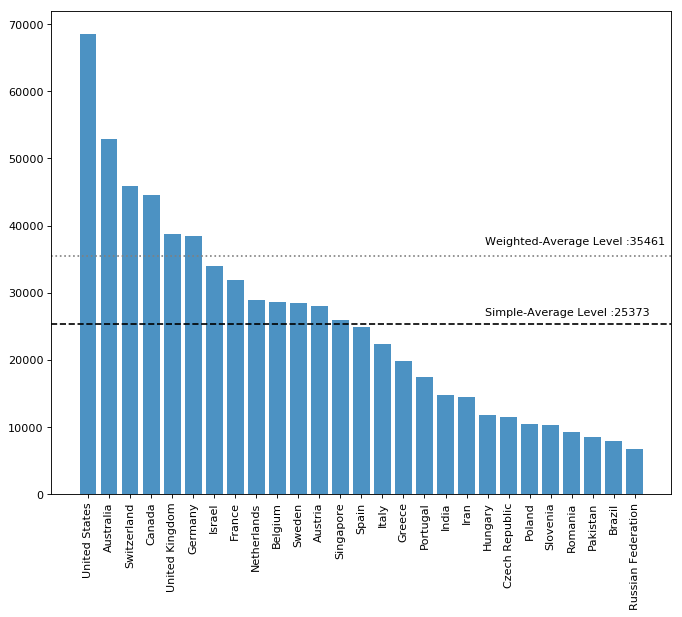

In [87]:
mean_level(df_q2, 'Country', 'ExpectedSalary')
plt.savefig('.\\fx_country_q2.png')

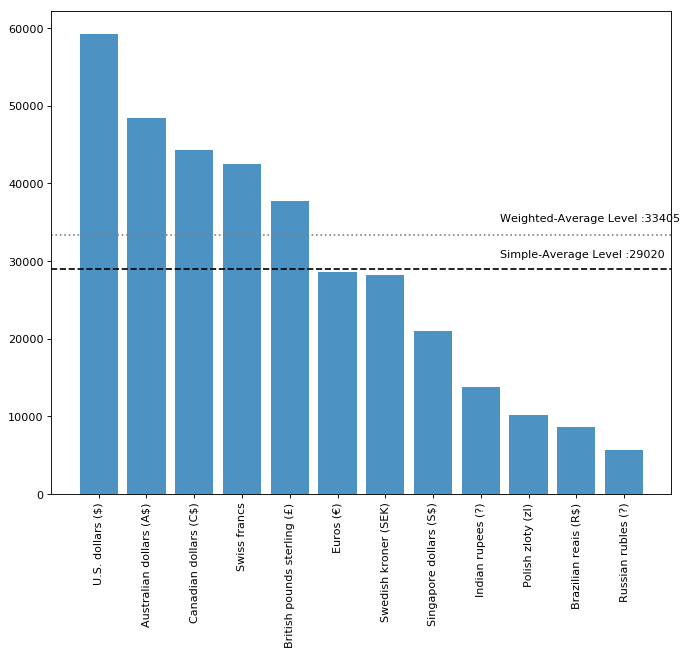

In [88]:
mean_level(df_q2, 'Currency', 'ExpectedSalary')
plt.savefig('.\\fx_currency_q2.png')

To delete the fixed effect related features.

In [43]:
fixed_effects = ['Country', 'Currency']
df_coefs_q2 = fixed_effect_cleaner(df_coefs_q2, labels = fixed_effects)

---Country
---Currency
Done!


In [44]:
df_coefs_q2[:10]

,features,coefficients,abs_coef
0,YearsCodedJob_20 or more years,18908.817426,18908.817426
1,MetricAssess_Customer satisfaction; Revenue performance; Manager's rating; Peers' rating,15308.274961,15308.274961
2,YearsCodedJob_19 to 20 years,13000.965098,13000.965098
3,YearsCodedJob_17 to 18 years,12742.794847,12742.794847
4,YearsCodedJob_12 to 13 years,11434.897477,11434.897477
5,JobProfile_Hired.com; LinkedIn,11296.352284,11296.352284
6,WantWorkLanguage_Go; Scala,11233.626374,11233.626374
7,DeveloperType_Machine learning specialist; Data scientist,11089.247312,11089.247312
8,HaveWorkedPlatform_Linux Desktop; Mac OS; Raspberry Pi; Amazon Web Services (AWS),10608.947477,10608.947477
9,YearsCodedJob_15 to 16 years,9989.552556,9989.552556


In [45]:
df_coefs_q2[-10:]

,features,coefficients,abs_coef
286,HaveWorkedLanguage_JavaScript; PHP; Ruby; SQL,-5474.904137,5474.904137
287,Overpaid_Somewhat underpaid,-5511.487254,5511.487254
288,ImportantBenefits_Annual bonus; Vacation/days off; Professional development sponsorship; Education sponsorship; Remote options,-6300.252472,6300.252472
289,EmploymentStatus_Employed part-time,-6991.275608,6991.275608
290,MetricAssess_Hours worked,-7633.394322,7633.394322
291,YearsCodedJob_Less than a year,-7670.938164,7670.938164
292,WantWorkFramework_Node.js; Cordova,-8128.453918,8128.453918
293,WantWorkLanguage_JavaScript; PHP; Python,-8658.073614,8658.073614
294,WantWorkLanguage_Go; Rust,-9627.160599,9627.160599
295,Overpaid_Greatly underpaid,-14422.986433,14422.986433


In [46]:
for i in range(len(df_coefs_q2.features.values)):
    df_coefs_q2.features.values[i]=  df_coefs_q2.features.values[i].replace('_', ':\n')
    df_coefs_q2.features.values[i] = df_coefs_q2.features.values[i].replace(';', '\n');

In [47]:
df_coefs_q2 = pd.concat([df_coefs_q2[:5],df_coefs_q2[-5:]],axis = 0).reset_index(drop = True)
df_coefs_q2.shape

(10, 3)

In [48]:
df_coefs_q2

,features,coefficients,abs_coef
0,YearsCodedJob:\n20 or more years,18908.817426,18908.817426
1,MetricAssess:\nCustomer satisfaction\n Revenue performance\n Manager's rating\n Peers' rating,15308.274961,15308.274961
2,YearsCodedJob:\n19 to 20 years,13000.965098,13000.965098
3,YearsCodedJob:\n17 to 18 years,12742.794847,12742.794847
4,YearsCodedJob:\n12 to 13 years,11434.897477,11434.897477
5,YearsCodedJob:\nLess than a year,-7670.938164,7670.938164
6,WantWorkFramework:\nNode.js\n Cordova,-8128.453918,8128.453918
7,WantWorkLanguage:\nJavaScript\n PHP\n Python,-8658.073614,8658.073614
8,WantWorkLanguage:\nGo\n Rust,-9627.160599,9627.160599
9,Overpaid:\nGreatly underpaid,-14422.986433,14422.986433


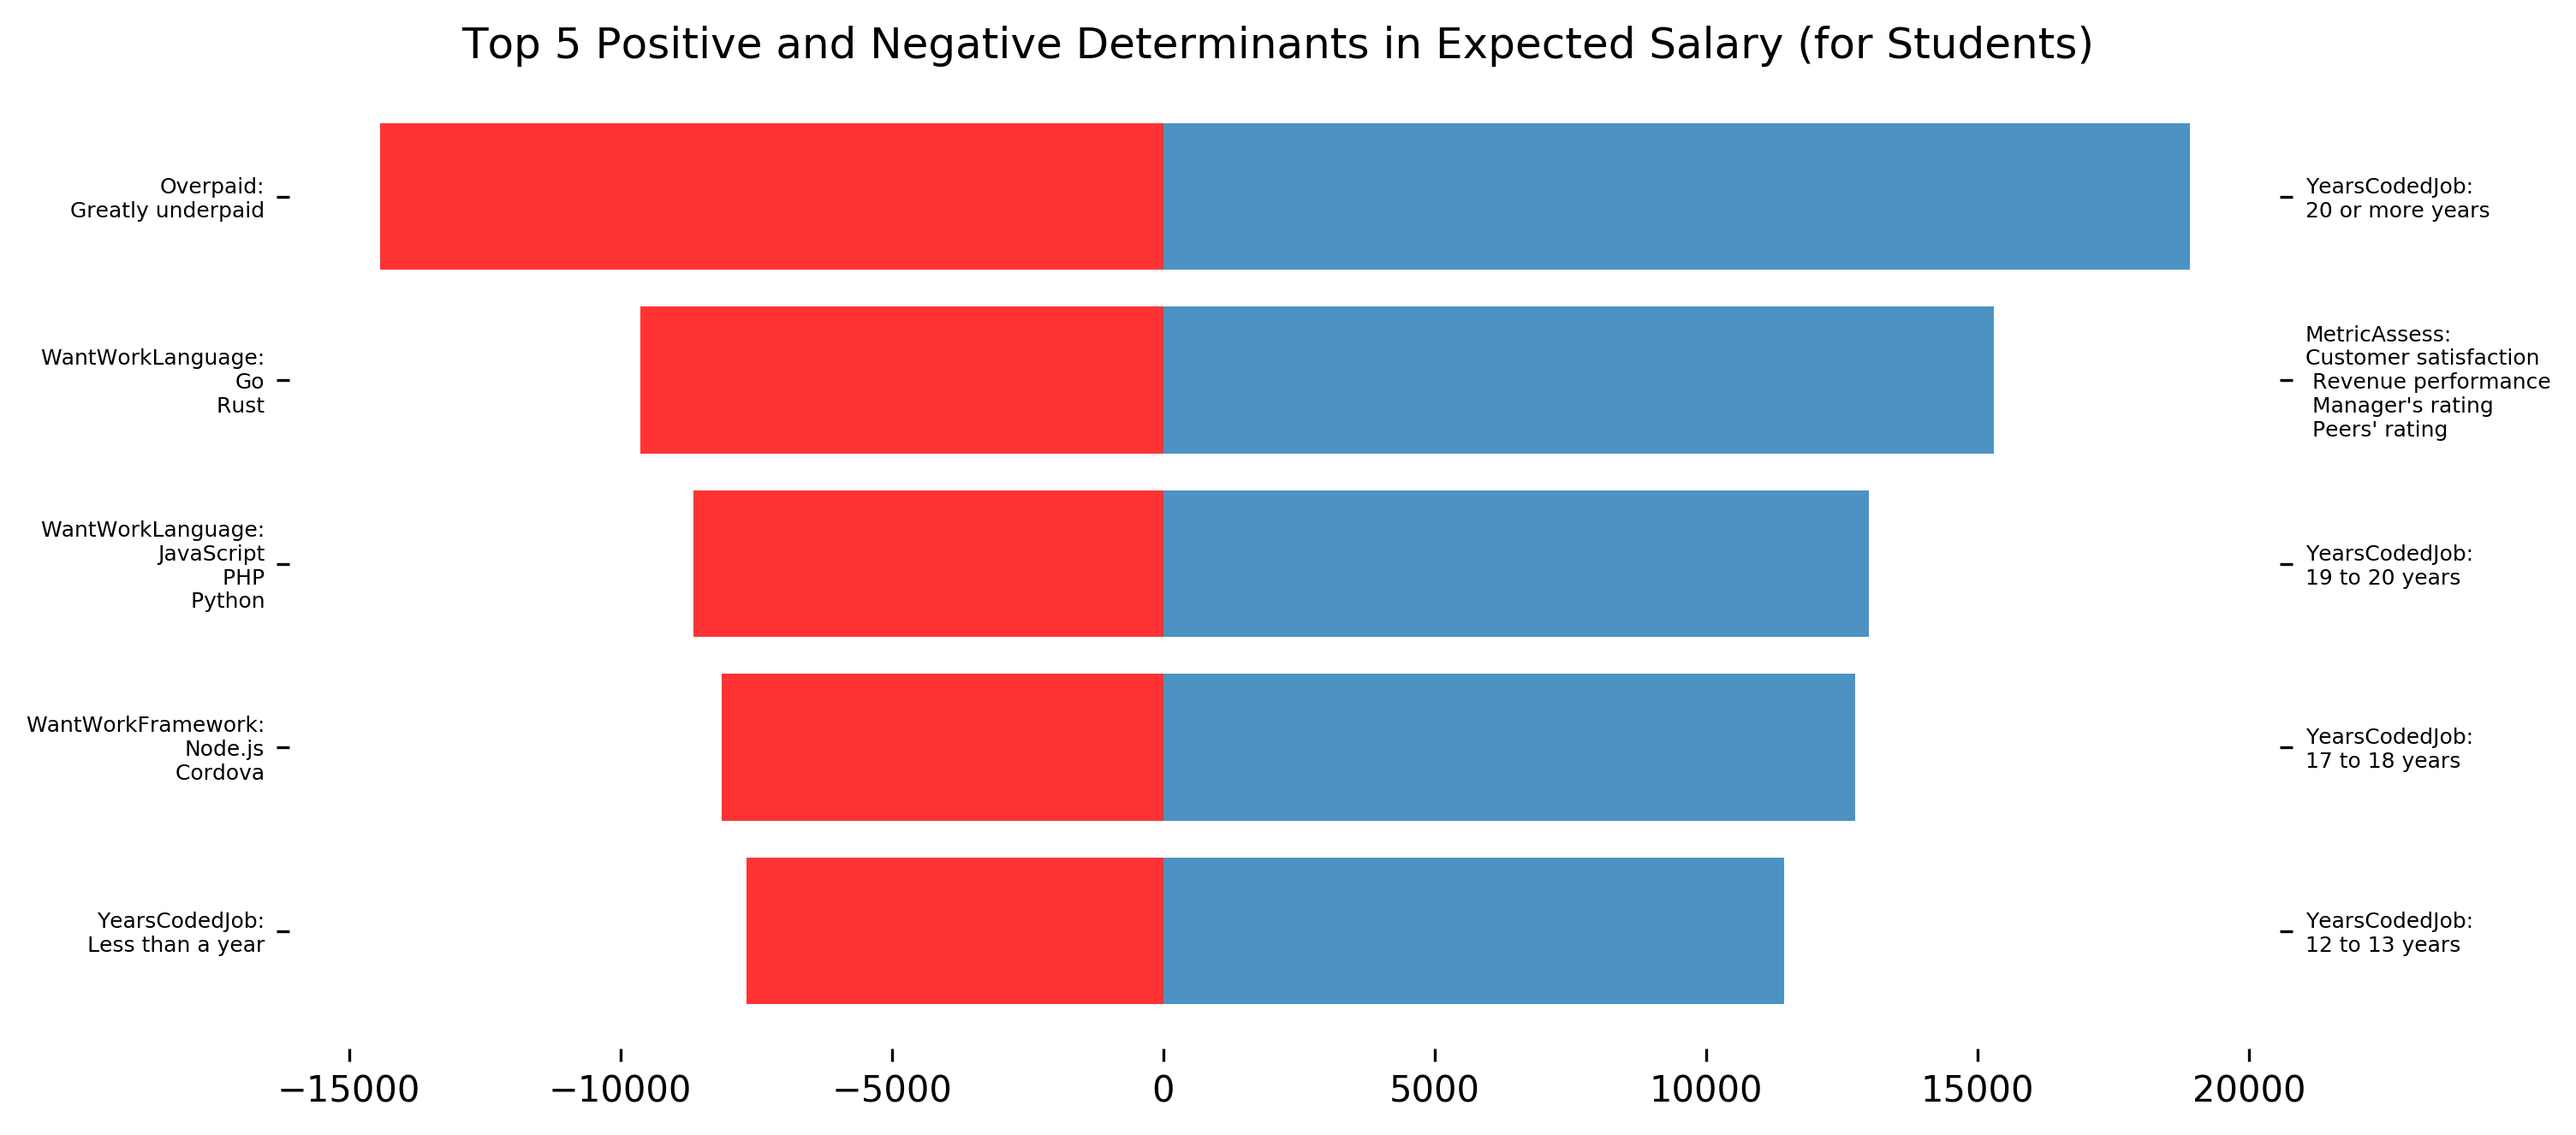

In [83]:
values_pos = df_coefs_q2.coefficients[0:5].sort_values()
values_neg = df_coefs_q2.coefficients[5:10]
x = range(len(values_pos))
labels_pos = list(df_coefs_q2[0:5].sort_values('coefficients').features)
labels_neg = list(df_coefs_q2.features.values[5:10])

fig, ax = plt.subplots(figsize = (10,5), dpi = 300)

ax.barh(x, values_pos, height=0.8, alpha=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.yticks([index for index in x], labels_neg, fontsize = 6)

ax2 = ax.twinx()
ax2.barh(x, values_neg, height= 0.8, alpha = 0.8, color = 'r')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.yticks([index for index in x], labels_pos, fontsize = 6)

plt.title('Top 5 Positive and Negative Determinants in Expected Salary (for Students) ', fontsize = 12)
plt.savefig('.\\Deter_Students.png')

By ignoring fixed effects such as countries and currency factors, determinants that affect how a student would expect his/her salary appear. 

**1. Working related factors:**

- Students those who have worked intensively on both C++ and Python would expect a higher salary than those on both C++ and Java. 
- Students those who want to work on Android or Arduino platform would expect a higher salary. 
- Students those who want to work on Mongo or PostgreSQL database would expect a higher salary. 
- Students those who want to work on AngularJS as framework would expect a lower salary. 
- Students those who normally use IDE as development environment would expect a lower salary. 

**2. Characteristics factors:**
- Students who disagree that learning new technology is interesting would expect a higher salary.
- Students who strongly agree that debugging is fun would expect a lower salary.

**3. Working environment factors:**

- Studnets who do not really care compensation and benefits offered from potential job would expect a lower salary.

So far, we have figured out main determinants that affect salary of professional developers and expected salary of students, who are going to be professional developers in next few years. It is curious that whether the expected salary matches the real salary earned in the future or not, and we can predict the real wage by our trainned model for those students.

Therefore, we would like to use the features of students to predict their salary in the future, and to see the difference between the two numbers: **Whether students are optimistic or pessimistic?**

On the other hand, it is necessary to point out that features that students have do not match well to the features in salary prediction model, hence we would wrangle the structure of data before the prediction. Firstly, we would not use features that is dropped in the prediction model. Secondly, **features that including in the prediction model but not appearing in the students data would be assumed to be 0**, which is reasonable since they do have no those features.

# Question 3 : Are students optimistic or pessimistive?

In [50]:
# Number of features used in developer model
X_test.shape[1]

2359

In [51]:
dev_features = list(X_test.columns)
df_q3 = dataWrangler(df_q2, 'ExpectedSalary', irrelevant = ['Respondent'], drop_value = 1)
df_q3.shape

(2566, 8321)

In [52]:
y = df_q3.ExpectedSalary

In [53]:
df_predict = pd.DataFrame()

for i in dev_features:
    if i in df_q3.columns:
        df_predict[i] = df_q3[i]
    else:
        df_predict[i] = 0
    
df_predict.shape


(2566, 2359)

In [54]:
df_predict.head()

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,"ProgramHobby_Yes, I contribute to open source projects","ProgramHobby_Yes, I program as a hobby","ProgramHobby_Yes, both",Country_Argentina,Country_Australia,Country_Austria,...,QuestionsInteresting_Strongly agree,QuestionsInteresting_Strongly disagree,QuestionsConfusing_Disagree,QuestionsConfusing_Somewhat agree,QuestionsConfusing_Strongly agree,QuestionsConfusing_Strongly disagree,InterestedAnswers_Disagree,InterestedAnswers_Somewhat agree,InterestedAnswers_Strongly agree,InterestedAnswers_Strongly disagree
0,6.0,5.0,4.805624,8.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,6.0,5.0,1.000000,5.0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
2,6.0,5.0,4.805624,5.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,6.0,5.0,4.000000,8.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,6.0,5.0,0.000000,7.0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0


Now, **df_new** has all the features that the developer dataset needs to have, it is time to prediction.

In [55]:
df_results = pd.DataFrame()

In [56]:
df_results['PredictedSalary'] = lasso.predict(df_predict)
df_results['ExpectedSalary'] = y 

In [57]:
df_results['Difference'] = df_results['ExpectedSalary'] - df_results['PredictedSalary']

In [58]:
mean, std = df_results.Difference.mean(), df_results.Difference.std()
mean, std 

(-1776.55894859952, 23522.41954237231)

In [62]:
p_opti = df_results.Difference[df_results.Difference > 0].count() / df_results.Difference.count()
p_pess = 1 - df_results.Difference[df_results.Difference > 0].count() / df_results.Difference.count()

In [63]:
mean_op, std_op = df_results.Difference[df_results.Difference > 0].mean(), df_results.Difference[df_results.Difference > 0].std()
mean_op, std_op

(17690.387851930336, 19410.002962767376)

In [64]:
mean_pe, std_pe = df_results.Difference[df_results.Difference < 0].mean(), df_results.Difference[df_results.Difference < 0].std()
mean_pe, std_pe

(-16290.69071280407, 13847.202488985165)

By simply defining that people who expect a higher salary in the future than his/her predicted salary is optimistic, and people whoc expect a lower salary in the future than his/her predicted salary is pessimitive (we have to say that it is a strong assumption but still indicative), we can see that people are slightly pessimitive on average (with a negative mean). The entire distribution is close to normal with slightly right-skewed. Explicilty, **57.29% of people are categorized to pessimitive** and **42.71% are seen as optimistic**. 

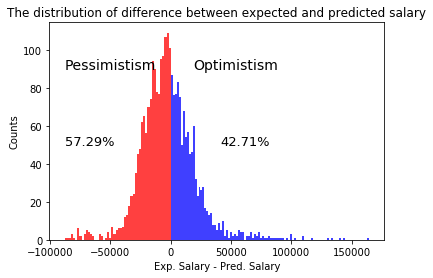

In [97]:
# Plot the distribution 

plt.hist(df_results.Difference[df_results.Difference > 0], bins = 100, color = 'b', alpha = 0.75)
plt.hist(df_results.Difference[df_results.Difference <= 0], bins = 50, color = 'r', alpha = 0.75)

plt.xlabel('Exp. Salary - Pred. Salary')
plt.ylabel('Counts')
plt.text(max(df_results.Difference)/9,90, f'Optimistism', fontsize = 14)
plt.text(max(df_results.Difference)/4,50, f'{p_opti:.2%}', fontsize = 13)
plt.text(min(df_results.Difference),90, f'Pessimistism', fontsize = 14)
plt.text(min(df_results.Difference),50, f'{p_pess:.2%}', fontsize = 13)
plt.title('The distribution of difference between expected and predicted salary')

plt.savefig('.\\distribution.png');

## ** Reference ** 

1. How to open the zip file by pandas: [Link](https://discuss.analyticsvidhya.com/t/how-to-read-zip-file-directly-in-python/1659)  

2. How to display full text in jypyter notebook: [Link](https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin)

3. 6 Different Ways to Compensate for Missing Values In a Dataset (Data Imputation with examples): [Link](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779)

4. Generalized Linear Regression: [Link](https://scikit-learn.org/stable/modules/linear_model.html)

5. (Chinese) Ridge and Lasso: [Link](https://www.jamleecute.com/regularized-regression-ridge-lasso-elastic/)